In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Load data

In [2]:
df1= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_Earthquake/t01.csv')
df2= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_Earthquake/t02.csv')
df3= pd.read_csv('/Users/zo/Desktop/SDS_Mobility/Flowminder/displacements_counts/Haiti_Earthquake/t03.csv')

In [3]:
#check and drop missing values
#replace entries for which building damage is missing with np.nan 

def clean_missing(df):
    df['t0_prop_damaged_buildings_300m']= df['t0_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')
    
    if 't1_prop_damaged_buildings_300m' in df.columns:
        df['t1_prop_damaged_buildings_300m']= df['t1_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')

    elif 't2_prop_damaged_buildings_300m' in df.columns:
        df['t2_prop_damaged_buildings_300m']= df['t2_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')
    
    elif 't3_prop_damaged_buildings_300m' in df.columns:
        df['t3_prop_damaged_buildings_300m']= df['t3_prop_damaged_buildings_300m'].apply(lambda x: x if x != -999.0 else 'unknown')

    #drop nan values
    df.dropna(inplace=True)    
    #drop duplicates
    df.drop_duplicates(inplace=True)
    df.drop_duplicates(subset=['t0_rog', 't0_entropy_step', 't0_known_locs','t0_prop_damaged_buildings_300m', 't0_EQ_MMI',
       't0_dist2_DTMsites_km_2010', 't0_popdensity3km_2010',
       't0_sumDTM_IDPpop_300m_2010'],inplace=True)
    
    df.reset_index(inplace=True)
    df.drop(columns='index', inplace=True)
    return df

In [4]:
df1, df2, df3= clean_missing(df1), clean_missing(df2), clean_missing(df3)

In [5]:
df_all = pd.merge(df1, df2, on=['t0_rog', 't0_entropy_step', 't0_known_locs','t0_prop_damaged_buildings_300m', 't0_EQ_MMI',
       't0_dist2_DTMsites_km_2010', 't0_popdensity3km_2010',
       't0_sumDTM_IDPpop_300m_2010'], how='inner')

In [6]:
df_all= pd.merge(df_all, df3, on=['t0_rog', 't0_entropy_step', 't0_known_locs','t0_prop_damaged_buildings_300m', 't0_EQ_MMI',
       't0_dist2_DTMsites_km_2010', 't0_popdensity3km_2010',
       't0_sumDTM_IDPpop_300m_2010'], how='inner')

In [7]:
df_all.rename(columns={'dist_to_hl_x': 't1_dist_to_hl',
                  'dist_to_hl_y': 't2_dist_to_hl',
                  'dist_to_hl': 't3_dist_to_hl'}, inplace=True)

In [8]:
cols_t0= df_all.columns[df_all.columns.str.startswith('t0')].tolist()
cols_t1= df_all.columns[df_all.columns.str.startswith('t1')].tolist()
cols_t2= df_all.columns[df_all.columns.str.startswith('t2')].tolist()
cols_t3= df_all.columns[df_all.columns.str.startswith('t3')].tolist()
cols= cols_t0 + cols_t1 + cols_t2 + cols_t3
df_all = df_all[cols]

In [9]:
for num, col in enumerate(df_all.columns):
    print(num, col)

0 t0_rog
1 t0_entropy_step
2 t0_known_locs
3 t0_prop_damaged_buildings_300m
4 t0_EQ_MMI
5 t0_dist2_DTMsites_km_2010
6 t0_popdensity3km_2010
7 t0_sumDTM_IDPpop_300m_2010
8 t1_known_locs
9 t1_prop_damaged_buildings_300m
10 t1_EQ_MMI
11 t1_dist2_DTMsites_km_2010
12 t1_popdensity3km_2010
13 t1_sumDTM_IDPpop_300m_2010
14 t1_dist_to_hl
15 t2_known_locs
16 t2_prop_damaged_buildings_300m
17 t2_EQ_MMI
18 t2_dist2_DTMsites_km_2010
19 t2_popdensity3km_2010
20 t2_sumDTM_IDPpop_300m_2010
21 t2_dist_to_hl
22 t3_known_locs
23 t3_prop_damaged_buildings_300m
24 t3_EQ_MMI
25 t3_dist2_DTMsites_km_2010
26 t3_popdensity3km_2010
27 t3_sumDTM_IDPpop_300m_2010
28 t3_dist_to_hl


### Descriptive Stats

#### Table

In [30]:
table= df_all.describe().transpose()
table = table.round(2)
table.reset_index(inplace=True)
table= table.rename(columns={'index': 'variable'})

In [33]:
table

,variable,count,mean,std,min,25%,50%,75%,max
0,t0_rog,11962.0,4.42,6.70,0.00,0.53,1.42,5.48,69.76
1,t0_entropy_step,11962.0,1.66,1.01,0.00,0.85,1.53,2.33,5.87
2,t0_known_locs,11962.0,0.82,0.22,0.09,0.67,0.90,1.00,1.00
3,t0_EQ_MMI,11962.0,8.22,0.46,5.50,7.50,8.50,8.50,8.50
4,t0_dist2_DTMsites_km_2010,11962.0,1.37,6.95,0.50,0.50,0.50,0.50,161.51
5,t0_popdensity3km_2010,11962.0,149.74,85.97,1.79,89.32,228.59,228.59,228.59
6,t0_sumDTM_IDPpop_300m_2010,11962.0,3029.34,3595.89,0.00,539.94,1682.50,3254.01,10384.55
7,t1_known_locs,11962.0,0.58,0.40,0.00,0.17,0.67,1.00,1.00
8,t1_EQ_MMI,11962.0,7.58,1.01,3.50,7.50,7.50,8.50,8.50
9,t1_dist2_DTMsites_km_2010,11962.0,40.79,64.92,0.50,0.50,0.50,50.00,161.51


#### Density Plot of Distance Travelled

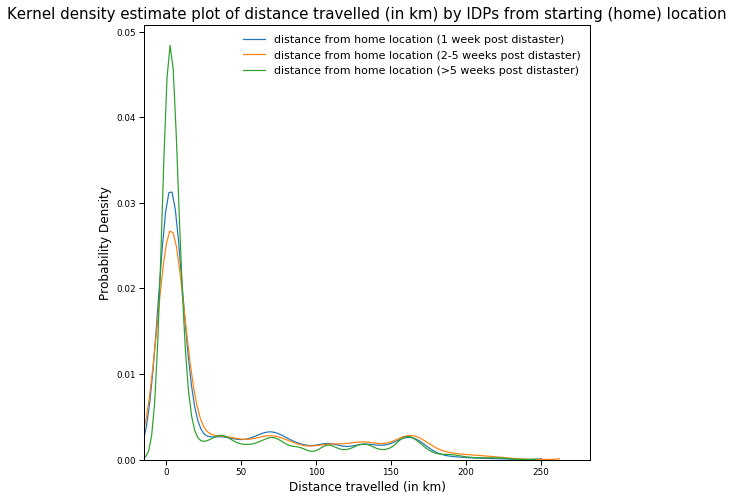

In [12]:
sns.set_context("paper", rc={"font.size":16,"axes.titlesize":15,"axes.labelsize":12})   
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Kernel density estimate plot of distance travelled (in km) by IDPs from starting (home) location")
ax.set(xlabel='Distance travelled (in km)', ylabel='Probability Density')
sns.kdeplot(df_all['t1_dist_to_hl'], ax=ax, label='distance from home location (1 week post distaster)').set(xlim=(-15, max(df_all['t1_dist_to_hl'])+50))
sns.kdeplot(df_all['t2_dist_to_hl'], ax=ax, label='distance from home location (2-5 weeks post distaster)').set(xlim=(-15, max(df_all['t2_dist_to_hl'])+50))
sns.kdeplot(df_all['t3_dist_to_hl'], ax=ax, label='distance from home location (>5 weeks post distaster)').set(xlim=(-15, max(df_all['t3_dist_to_hl'])+50))
ax.legend(loc='upper right', frameon=False, fontsize=11)

In [13]:
figure = ax.get_figure()    
figure.savefig('disp_plot_EQ.png', dpi=400)

#### Heatmaps

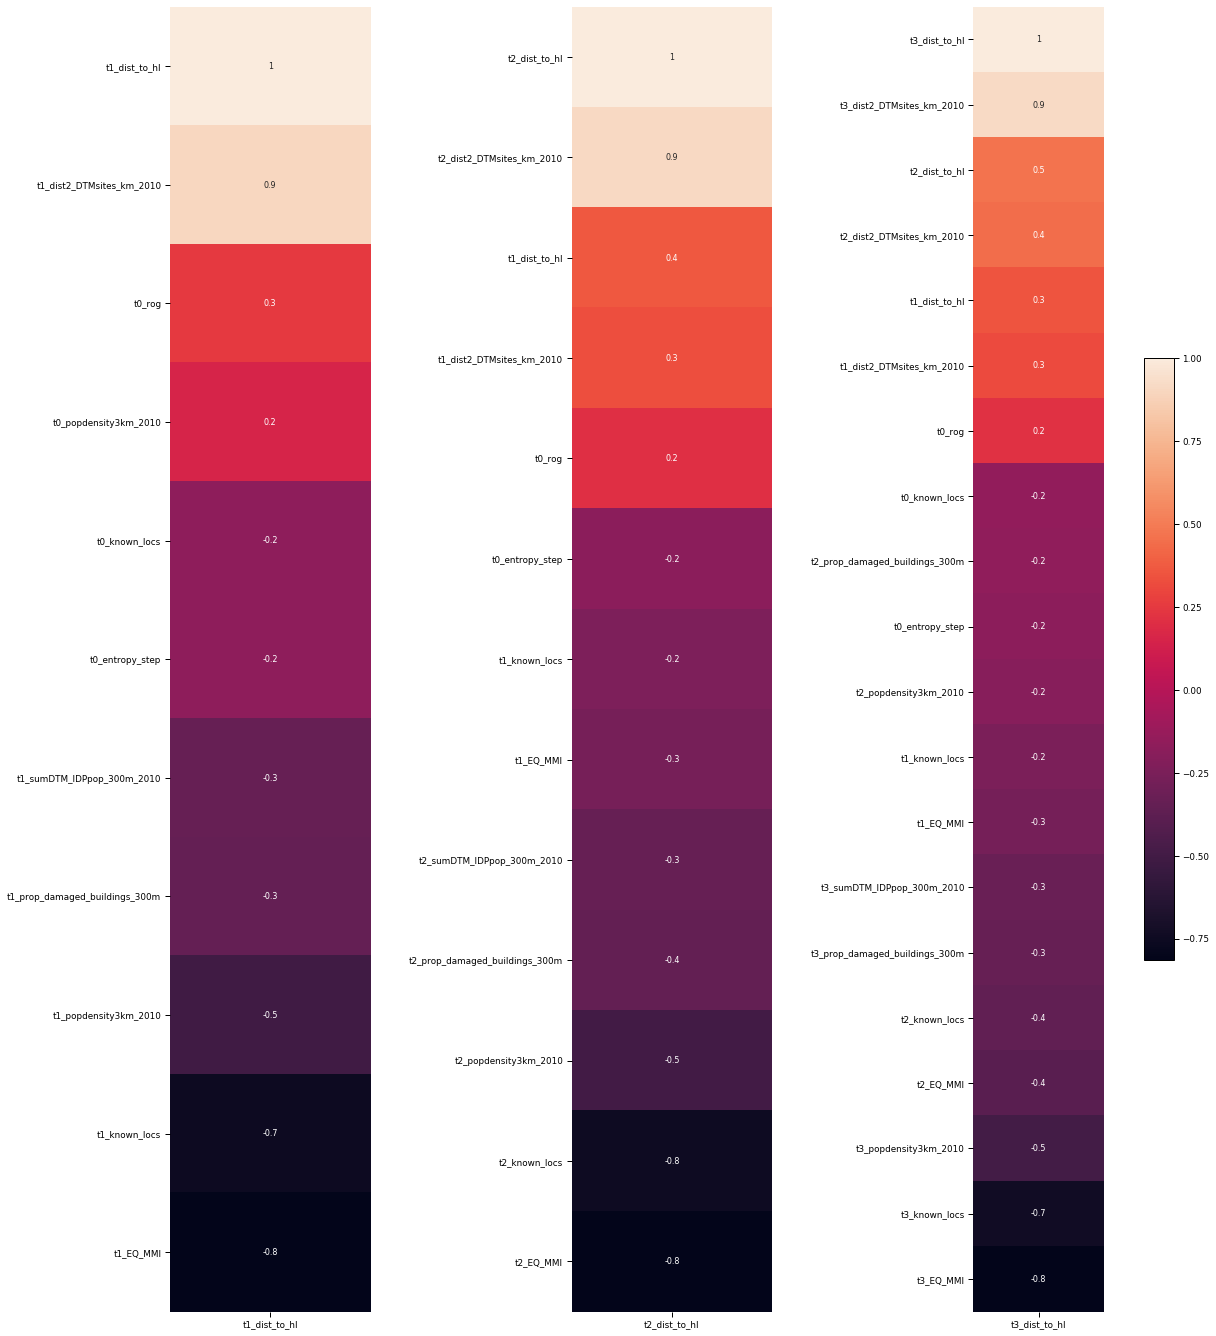

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 24))
fig.subplots_adjust(wspace=1)

#for distance travelled at time step 1
heat1_vars= df_all.iloc[:, 0:15]
heat1_vars= heat1_vars.replace('unknown', 0)

heat1_corr= heat1_vars.corr()
heat1_corr[np.abs(heat1_corr['t1_dist_to_hl'])<.15] = np.nan #setting low correlations to nan
heat1_corr.dropna(axis=0, inplace=True) #dropping low correlations variables

mask = np.zeros_like(heat1_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heat1_corr[['t1_dist_to_hl']].sort_values(by=['t1_dist_to_hl'],ascending=False), annot=True, 
            annot_kws={"size": 8}, fmt='.1g', ax=ax1, cbar=False)


#for distance travelled at time step 2
heat2_vars= df_all.iloc[:, 0:22]
heat2_vars= heat2_vars.replace('unknown', 0)

heat2_corr= heat2_vars.corr()
heat2_corr[np.abs(heat2_corr['t2_dist_to_hl'])<.15] = np.nan #setting low correlations to nan
heat2_corr.dropna(axis=0, inplace=True) #dropping low correlations variables

mask = np.zeros_like(heat2_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heat2_corr[['t2_dist_to_hl']].sort_values(by=['t2_dist_to_hl'],ascending=False)
                 , annot=True, annot_kws={"size": 8}, fmt='.1g', ax=ax2, cbar=False)

#for distance travelled at time step 3
heat3_vars= df_all.iloc[:, :]
heat3_vars= heat3_vars.replace('unknown', 0)

heat3_corr= heat3_vars.corr()
heat3_corr[np.abs(heat3_corr['t3_dist_to_hl'])<.15] = np.nan #setting low correlations to nan
heat3_corr.dropna(axis=0, inplace=True) #dropping low correlations variables

mask = np.zeros_like(heat3_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(heat3_corr[['t3_dist_to_hl']].sort_values(by=['t3_dist_to_hl'],ascending=False)
                 , annot=True, annot_kws={"size": 8}, fmt='.1g', ax=ax3, cbar=False)

fig.colorbar(ax3.collections[0], ax=ax3,location="right", use_gridspec=False, pad=0.2)

In [19]:
fig.savefig('heat_EQ.png', dpi=500)